---
layout: single
title: 'Computing and plotting 2d spatial point density in R'
date: 2016-07-07
authors: [Max Joseph]
category: [tutorials]
excerpt: 'This tutorial demonstrates how to compute 2d spatial density and visualize the result using storm event data from NOAA.'
sidebar:
  nav:
author_profile: false
comments: true
lang: [r]
lib: [ggmap]
---

It is often useful to quickly compute a measure of point density and show it on a map. 
In this tutorial, we'll demonstrate this using storm event data from the [NOAA Storm Events Database](https://www.ncdc.noaa.gov/stormevents/) in 2014. 

## Objectives

- Compute 2d spatial density of points
- Plot the density surface with a basemap

## Dependencies

- rnoaa
- ggmap
- wget
- gzip

We'll start by loading some libraries and specifying that we want to output figures in png format. 

In [1]:
library(ggmap)
library(viridis)
options(jupyter.plot_mimetypes = 'image/png') # reduces file size

Loading required package: ggplot2


Then, we can load a built-in crime dataset for Houston Texas and fetch a basemap for the region. 

In [2]:
# remove any rows with missing data
crime <- crime[complete.cases(crime), ]

# look at the structure of the crime data
str(crime)

# load a basemap
basemap <- get_map(location = "Houston, TX", zoom = 9)

'data.frame':	81803 obs. of  17 variables:
 $ time    : POSIXt, format: "2009-12-31 23:00:00" "2009-12-31 23:00:00" ...
 $ date    : chr  "1/1/2010" "1/1/2010" "1/1/2010" "1/1/2010" ...
 $ hour    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ premise : chr  "18A" "13R" "20R" "20R" ...
 $ offense : Factor w/ 7 levels "aggravated assault",..: 4 6 1 1 1 3 3 3 3 3 ...
 $ beat    : chr  "15E30" "13D10" "16E20" "2A30" ...
 $ block   : chr  "9600-9699" "4700-4799" "5000-5099" "1000-1099" ...
 $ street  : chr  "marlive" "telephone" "wickview" "ashland" ...
 $ type    : chr  "ln" "rd" "ln" "st" ...
 $ suffix  : chr  "-" "-" "-" "-" ...
 $ number  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ month   : Ord.factor w/ 8 levels "january"<"february"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ day     : Ord.factor w/ 7 levels "monday"<"tuesday"<..: 5 5 5 5 5 5 5 5 5 5 ...
 $ location: chr  "apartment parking lot" "road / street / sidewalk" "residence / house" "residence / house" ...
 $ address : chr  "9650 marlive ln" "4750 telephone rd

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Houston,+TX&zoom=9&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston,%20TX&sensor=false


Let's plot the locations of crimes on top of our basemap by adding a layer of points. 

Warning message:
: Removed 185 rows containing missing values (geom_point).

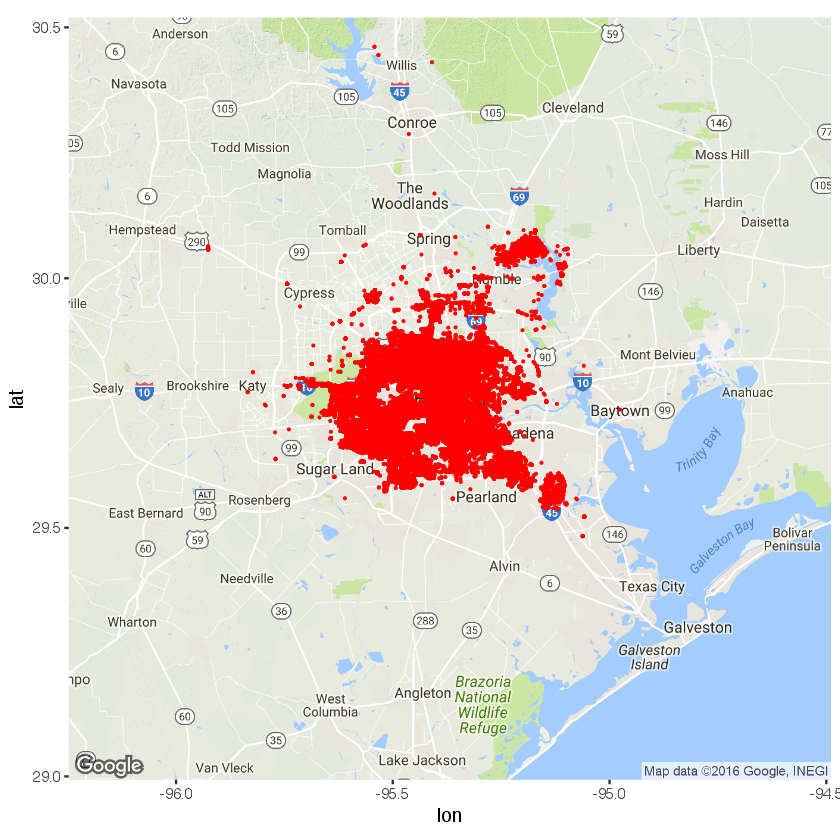

In [3]:
ggmap(basemap) + 
  geom_point(data = crime, col = "red", size = .1)

There seems to be a fair bit of overplotting. Let's instead plot a density estimate. There are many ways to compute densities, and if the mechanics of density estimation are important for your application, it is worth investigating packages that specialize in point pattern analysis (e.g., [spatstat](https://cran.r-project.org/web/packages/spatstat/index.html)). If on the other hand, you're lookng for a quick and dirty implementation for the purposes of exploratory data analysis, you can also use ggplot's [`stat_density2d`](http://docs.ggplot2.org/0.9.3.1/stat_density2d.html), which uses [`MASS::kde2d`](https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/kde2d.html) on the backend to estimate the density using a bivariate normal kernel.
Combined with the basemap functionality of `ggmap`, visualizing spatial density is fairly straightforward:

Warning message:
: Removed 185 rows containing non-finite values (stat_density2d).

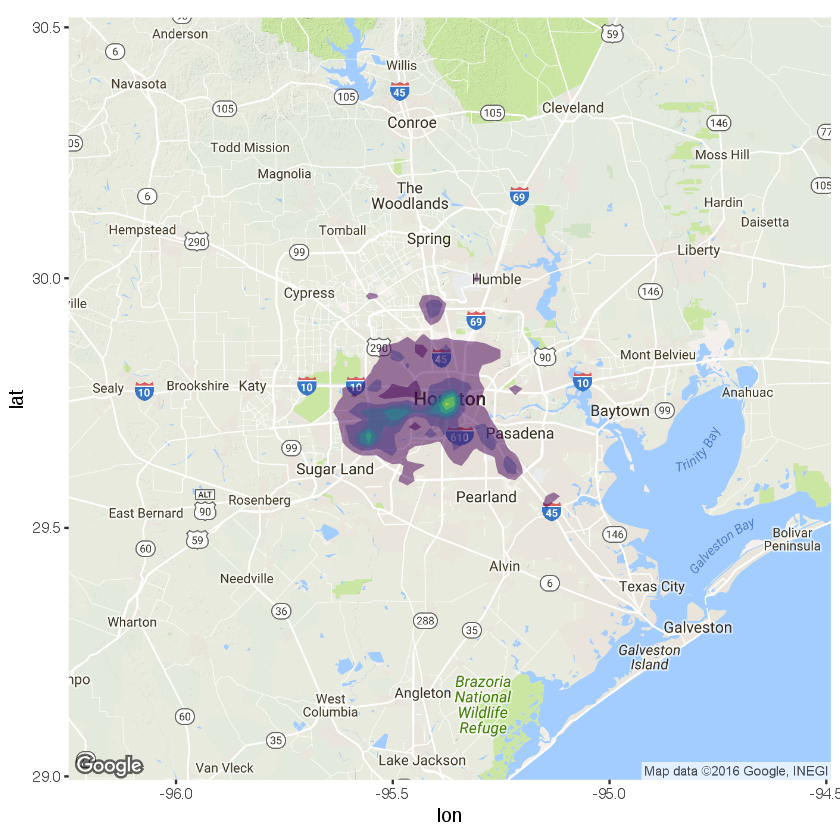

In [4]:
ggmap(basemap) + 
  stat_density2d(aes(fill = ..level..), alpha = .5,
                 geom = "polygon", data = crime) + 
  scale_fill_viridis() + 
  theme(legend.position = 'none')

You can pass arguments for `kde2d` through the call to `stat_density2d`. 
In this case, we alter the argument `h`, which is a bandwidth parameter related to the spatial range or smoothness of the density estimate. 

Warning message:
: Removed 185 rows containing non-finite values (stat_density2d).

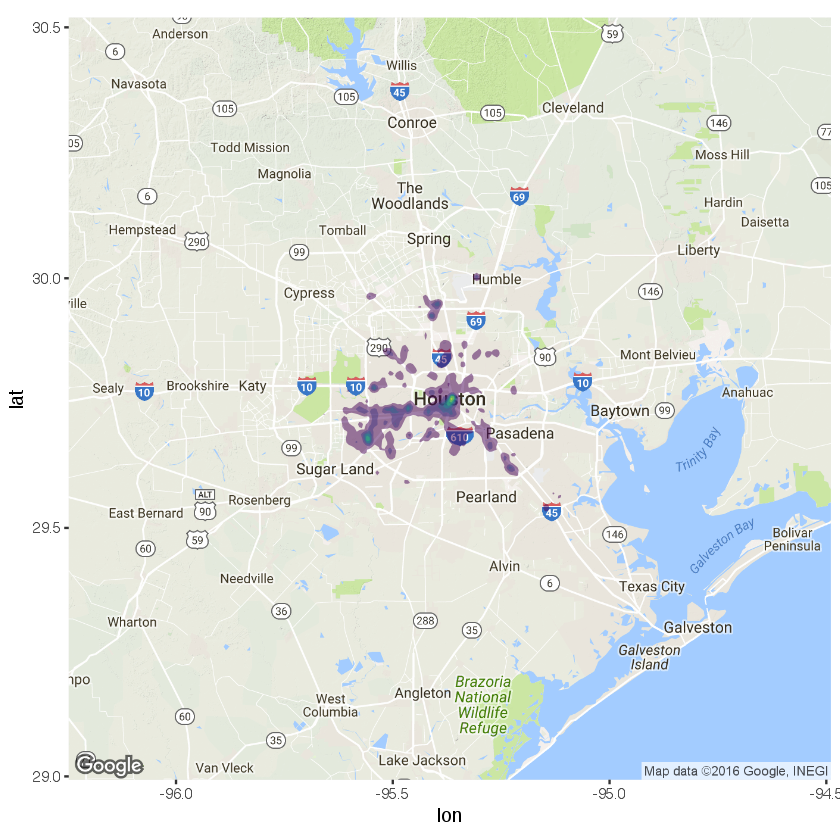

In [5]:
ggmap(basemap) + 
  stat_density2d(aes(fill = ..level..), alpha = .5, 
                 h = .02, n = 300,
                 geom = "polygon", data = crime) + 
  scale_fill_viridis() + 
  theme(legend.position = 'none')

As an alternative, we might consider plotting the raw data points with alpha transparency so that we can see the actual data, not just a model of the data. 

Warning message:
: Removed 185 rows containing missing values (geom_point).

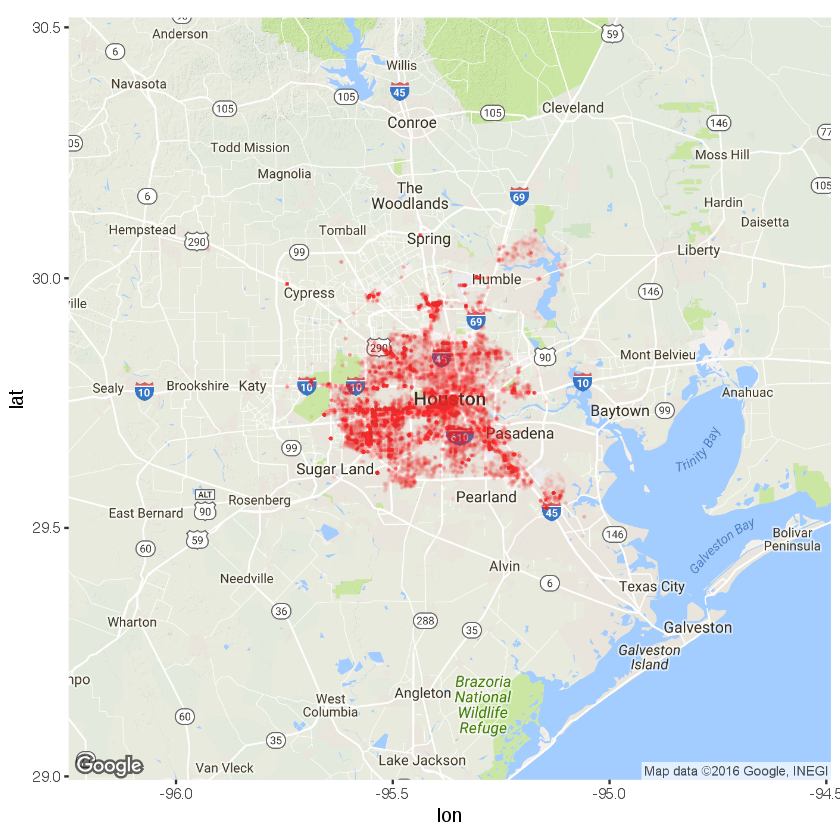

In [6]:
ggmap(basemap) + 
  geom_point(data = crime, col = "red", 
             size = .1, alpha = .01)